<a href="https://colab.research.google.com/github/P4RTH4-ROY/flower-classification/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 Load Dataset with ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=30,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset for Colab/flowers',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset for Colab/flowers',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
#2 Build a Simple CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#3Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1251s 11s/step - accuracy: 0.2989 - loss: 1.5647 - val_accuracy: 0.5105 - val_loss: 1.1632
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.5747 - loss: 1.0627 - val_accuracy: 0.5907 - val_loss: 1.0381
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.6183 - loss: 0.9619 - val_accuracy: 0.6291 - val_loss: 0.9564
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.6672 - loss: 0.8859 - val_accuracy: 0.6640 - val_loss: 0.8849
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.6629 - loss: 0.8872 - val_accuracy: 0.6640 - val_loss: 0.8813
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.6826 - loss: 0.8146 - val_accuracy: 0.6872 - val_loss: 0.8230
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.6951 - loss: 0.8148 - val_accuracy: 0.6721 - val_loss: 0.8228
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.6933 - loss: 0.7735 - val_ac

27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 781ms/step


<Axes: title={'center': 'Accuracy'}>

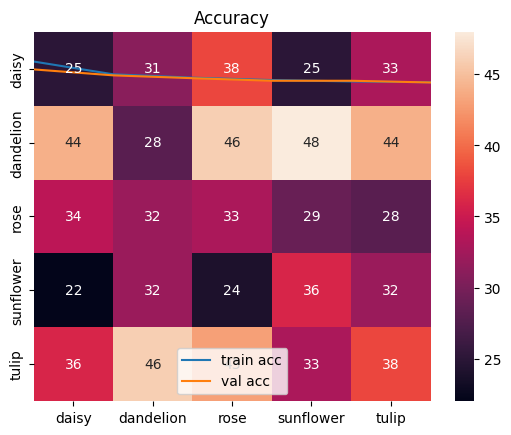

In [ ]:
#4 Evaluate and Visualize Results
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

# Confusion matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_generator.class_indices,
            yticklabels=val_generator.class_indices)

27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 792ms/step


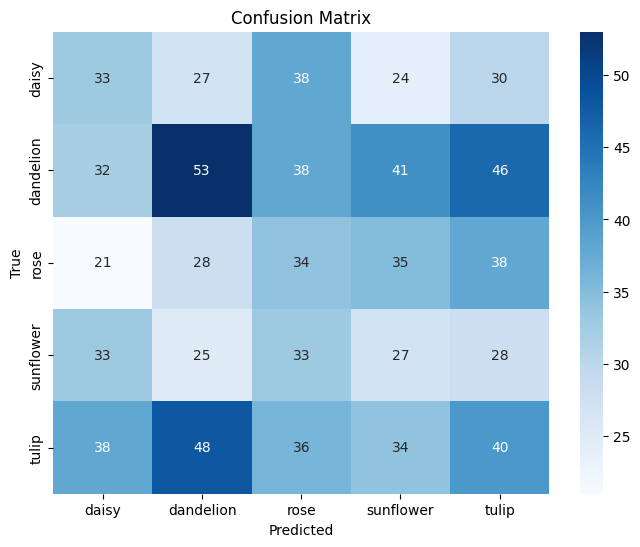

Classification Report:

              precision    recall  f1-score   support

       daisy       0.21      0.22      0.21       152
   dandelion       0.29      0.25      0.27       210
        rose       0.19      0.22      0.20       156
   sunflower       0.17      0.18      0.18       146
       tulip       0.22      0.20      0.21       196

    accuracy                           0.22       860
   macro avg       0.22      0.22      0.22       860
weighted avg       0.22      0.22      0.22       860



In [ ]:
#5 Confusion Matrix, Precision & Recall
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Get predictions
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# 2. True labels
y_true = val_generator.classes

# 3. Class names
class_names = list(val_generator.class_indices.keys())

# 4. Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 5. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 6. Classification report (precision, recall, F1)
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)
